# Descripción del Proyecto
Trabajamos para la compañía minera OilyGiant. Nuestra tarea es encontrar el mejor lugar para un nuevo pozo.  
Para esto realizaremos los siguientes pasos:  
- Recolectar los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
- Construir un modelo para predecir el volumen de reservas en los nuevos pozos;
- Seleccionar los pozos de petróleo con los valores estimados más altos;
- Eligir la región con el mayor beneficio total para los pozos de petróleo seleccionados.

Tenemos datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crearé un modelo que ayude a elegir la región con el mayor margen de beneficio. Analizaré los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Entrenamiento-de-modelos" data-toc-modified-id="Entrenamiento-de-modelos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entrenamiento de modelos</a></span></li><li><span><a href="#Presupuesto-y-volumenes-promedio" data-toc-modified-id="Presupuesto-y-volumenes-promedio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Presupuesto y volumenes promedio</a></span></li><li><span><a href="#Cálculo-de-beneficios" data-toc-modified-id="Cálculo-de-beneficios-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cálculo de beneficios</a></span></li><li><span><a href="#Bootstrapping" data-toc-modified-id="Bootstrapping-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bootstrapping</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

## Inicialización

In [1]:
# Cargamos todas las librerías a usar
import pandas as pd
from IPython.display import display, HTML, Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Definimos una función Print que sea visualmente mas amigable
def print_mejorado(texto,size):
    size=str(size)
    display(HTML('<span style="font-size: '+size+'px;">'+texto+'</span>'))  

## Cargar los datos

In [3]:
# Carga de los datos de exploración geológica de las tres regiones
data_0=pd.read_csv('/datasets/geo_data_0.csv')
data_1=pd.read_csv('/datasets/geo_data_1.csv')
data_2=pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<b>Características</b>  
- <i>id</i>: identificador único de pozo de petróleo  
- <i>f0</i>: característica del punto
- <i>f1</i>: característica del punto
- <i>f2</i>: característica del punto

<b>Objetivo</b>
- <i>product</i>: volumen de reservas en el pozo de petróleo (miles de barriles)

Con respecto a la data de las tres regiones, tenemos 10.000 datos por cada región y no tenemos datos nulos. Podemos comenzar a trabajar con esta información.

## Entrenamiento de modelos

A continuación, se entrenaran modelos de regresión lineal para cada una de las regiones. Para realizar esto, se separará cada set de datos en una proporción (75:25), 75% para entrenamiento y 25% para validación.  

Una vez entrenado cada modelo, se calculará la raiz del error cuadratico medio RECM (RMSE en inglés) para evaluar el error de las predicciones obtenidas con el conjunto de validación versus los valores reales.  

Finalmente se calculará el volumen de crudo promedio estimado y real para cada región según los datos de validación.

Para poder realizar esto facilmente para cada región, se creará una función.

In [10]:
def train_lineal_model(data,region):
    #Separamos la data en un 75:25
    train, valid = train_test_split(data, test_size=0.25, random_state=12345)
    
    #Caracteristicas y objetivos (entrenamiento)
    features_train = train.drop(['id','product'], axis=1)
    target_train = train['product']
    
    #Caracteristicas y objetivos (validacion)
    features_valid = valid.drop(['id','product'], axis=1)
    target_valid = valid['product']
    
    #Entrenamiento de modelo de Regresión lineal
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    #Predicción usando caracteristicas de validación
    predicted_valid = model.predict(features_valid)
    
    #Calculo de ECM y RECM (error del modelo)
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse=mse**0.5
    
    #Calculo de volumenes
    vol_mean_predicted=predicted_valid.mean()
    vol_mean_real=target_valid.mean()
    
    print_mejorado(f'{region}',24)
    print_mejorado(f'RECM: {rmse:.3f}',20)
    print_mejorado(f'Volumen promedio estimado de las reservas previstas {vol_mean_predicted:.3f} (miles de barriles)',20)
    print_mejorado(f'Volumen promedio real de las reservas: {vol_mean_real:.3f} (miles de barriles)',20)
    
    
    #Retornamos valores predecidos y reales
    return predicted_valid,target_valid    

Una vez creada la función que crea, entrena y evalúa nuestro modelo la aplicamos a cada una de las regiones. Además, almacenamos las predicciones y los datos reales en variables para ser usadas posteriomente.

In [11]:
#Región 0
predicted_0,real_0=train_lineal_model(data_0,'Región 0')

In [12]:
#Región 1
predicted_1,real_1=train_lineal_model(data_1,'Región 1')

In [13]:
#Región 2
predicted_2,real_2=train_lineal_model(data_2,'Región 2')

De lo anterior, observando el RECM, se concluye que el modelo de la región 1 predice con mayor precisión respecto a las regiones 0 y 2. Sin embargo, esta región **en promedio tiene un volumen de de crudo mucho menor a las otras regiones**. Con respecto a las regiones 0 y 2, estos modelos muestran un desempeño y volumenes similar.
Finalmente, los volumenes promedio predichos por cada modelo son similares a los volumenes reales.

## Presupuesto y volumenes promedio

Sabemos que la empresa tiene un presupuesto de 100 millones de dolares para explotar 200 pozos, por lo tanto, en presupuesto promedio por pozo es de:

In [14]:
presupuesto_por_pozo=100000000/200
print_mejorado(f'El presupuesto promedio por pozo es de {presupuesto_por_pozo:.0f} USD',20)

Y sabiendo que un barril de materias primas genera 4,5 USD de ingresos por barril, entonces, dado que el volumen en nuestros datos es representado en "miles de barriles" por unidad. El ingreso por unidad es de 4500 dolares. Teniedo esto presente, podemos calcular el volumen mínimo promedio que tiene que tener cada pozo para no tener pérdidas:

In [15]:
volumen_minimo_pozo=presupuesto_por_pozo/4500
volumen_minimo_pozo
print_mejorado(f'El volumen mínimo promedio por pozo para no tener perdidas es de {volumen_minimo_pozo:.2f} (miles de barriles)',20)

En relación a lo anterior, podriamos pensar que ninguna de las 3 regiones es rentable dado que el volumen promedio en ellas es menor al valor minimo requerido. Sin embargo, esto no es correcto, dado que cada región puede poseer pozos muy por sobre este promedio (y menores tambien) y dependerá de nuestro modelo identificar los pozos mas rentables para maximizar las ganancias.

## Cálculo de beneficios

Al explorar cada región, se llevará a cabo un estudio de 500 puntos de extracción y se seleccionaran los mejores 200 puntos de extracción basandonse en nuestro modelo de predicción.

Para obtener los beneficios de los mejores 200 puntos de 500, crearé una función a la cual se le pasará como entrada 500 predicciones elegidas al azar junto con sus respectivos valores reales. Luego, esta función elegirá las 200 mejores predicciones y calculará el ingreso en base a los valores reales.Finalmente, para obtener el beneficio, se le restará la inversión inicial (100.000.000 USD)

**Ejemplo**
    
| Pozo | Predicción                 | Realidad                   |
|:-----|:--------------------------|:--------------------------|
| 1    | 200 millones de barriles  | 80 millones de barriles   |
| 2    | 190 millones de barriles  | 220 millones de barriles  |
| 3    | 185 millones de barriles  | 150 millones de barriles  |
| 4    | 170 millones de barriles  | 170 millones de barriles  |
| 5    | 165 millones de barriles  | 170 millones de barriles  |


Ingresos según modelo: (200+190+185+170+165)\*4500=4.095 millones de dolares  
Ingresos reales: (80+220+150+170+170)\*4500=3.555 millones de dolares

In [16]:
def mejores_200(real, predicted):    
    predicted=pd.Series(predicted, index=real.index)
    
    #Ordenamos de mayor a menor las predicciones de entrada
    predicted_sorted = predicted.sort_values(ascending=False)
    
    #Tomamos los primeros 200 valores reales correpondientes a dicha predicción
    selected = real[predicted_sorted.index][:200]
    
    #Retornamos loa beneficios multiplicando la suma de los volumenes por 4500 menos la inversion inicial
    return 4500 * sum(selected)-100_000_000

A continuación aplicaré la función para las 2500 predicciones de cada región. De esta forma obtendre las ganancias de los 200 pozos que según la predicción, serían lo mas fructiferos.

In [17]:
print_mejorado(f"Región 0",24)
print_mejorado(f"Beneficio de los mejores pozos segun la predicción: {mejores_200(real_0, predicted_0)/1000000:.2f} millones de dolares",20)

In [18]:
print_mejorado(f"Región 1",24)
print_mejorado(f"Beneficio de los mejores pozos segun la predicción: {mejores_200(real_1, predicted_1)/1000000:.2f} millones de dolares",20)

In [19]:
print_mejorado(f"Región 2",24)
print_mejorado(f"Beneficio de los mejores pozos segun la predicción: {mejores_200(real_2, predicted_2)/1000000:.2f} millones de dolares",20)

Si se pudiera aplicar el modelo a todos los puntos de cada región, y luego quedarnos con los 200 mejores, **la región que generaría mayores beneficios sería la región 0, con 33,2 millones.**  
Lamentablemente esto en la realidad no es posible, y la compañia solo hará un estudio de 500 puntos de extracción y para luego quedarse con los 200 mejores que indique el modelo.
Para poder hacer un estimado de cuanto sería la ganancia por región considerando solo 500 puntos junto con su respectivo riesgo, se utilizará la técnica de Bootstrapping, la cual se explica a continuación.

## Bootstrapping

La tecnica de Bootstrapping consiste en obtener multiples muestras al azar (submuestras) de una muestra mas grande. Esto nos permite evaluar el comportamiento de un modelo para multiples submuestras, las cuales, a pesar de venir de una misma muestra, pueden ser muy diferentes entre si. Para este caso en particular es útil ya que podemos poner a prueba distintas submuestras de nuestros 2500 datos de validación.

Para aplicar la tecnica de bootstrapping, tomaré 1000 submuestras al azar de las 2500 (predicciones/datos reales). Cada submuestra será de 500 datos cada una y en cada iteración se obtendra la ganancia que otorgaría esta submuestra usando la función construida anteriormente. De esta manerá, obtendremos la distribución de las ganancias obtenidas al elegir 500 puntos al azar, en donde luego nuestro modelo elegió las 200 mejores.  

Finalmente. calcularemos el intervalo de confianza de 95% y las ganancias minimas obtenidas el 2.5% de las veces (riesgo).


Como debemos hacer esto para 3 regiones diferentes, una vez mas, crearé una función:

In [20]:
def bootstrapping(real,predicted,riesgo,region):

    state = np.random.RandomState(12345)
    predicted=pd.Series(predicted, index=real.index)

    values = []
    
    #Ciclo que se repite 1000 veces
    for i in range(1000):
        #Obtenemos una submuestra al azar de 500 datos proveniente de los datos reales
        target_subsample = real.sample(n=500, replace=True, random_state=state)
        #Obtenemos las predicciones correspondientes a los valores 500 valores reales elegidos anteriormente
        probs_subsample = predicted[target_subsample.index]
        #Guardamos los beneficios para esta muestra usando la función del punto anterior
        values.append(mejores_200(target_subsample,probs_subsample))

    
    values = pd.Series(values)
    #Beneficios minimas (2.5% inferior)
    lower = values.quantile(riesgo)
    #Beneficios máximas (2.5% superior)
    higher = values.quantile(0.975)
    mean = values.mean()
    
    #Calculo de perdidas asumiendo el peor escenario (que se da el 2.5% de las veces)
    perdidas=(lower)/1000000
    
    riesgo=0
    for valor in values:
        if valor < 0:
            riesgo = riesgo+1
            
    riesgo=(riesgo/1000)
    riesgo_quantile = values.quantile(riesgo)
    
    values_escalados=values/1000000
    values_escalados.hist(bins=50, figsize=(15,8))
    plt.axvline(x=mean/1000000, color='r', label='Media')
    plt.axvline(x=lower/1000000, color='b', label='Límite inferior(intervalo de confianza 95%)')
    plt.axvline(x=higher/1000000, color='b', label='Límite superior(intervalo de confianza 95%)')
    plt.axvline(x=riesgo_quantile/1000000, color='orange', label='Riesgo mínimo')
    plt.xlabel('Beneficios (millones de dolares)', fontsize=20) 
    plt.ylabel('Iteraciones', fontsize=20)
    plt.legend(fontsize=12)
    
    print_mejorado(f"{region}",24)
    print_mejorado(f"Beneficio promedio: {mean/1000000:.2f} millones de dolares",20)
    print_mejorado(f"Cuantil del 2.5 %: {lower/1000000:.2f} millones de dolares",20)
    print_mejorado(f"Cuantil del 97.5 %: {higher/1000000:.2f} millones de dolares",20)
    print_mejorado(f"Intervalo de confianza del 95%: [{lower/1000000:.2f},{higher/1000000:.2f}] millones de dolares",20)
    print_mejorado(f"Riesgo de perdidas 2.5%: {perdidas:.2f}%",20)
    print_mejorado(f"Riesgo minimo: {riesgo*100:.2f}%",20)

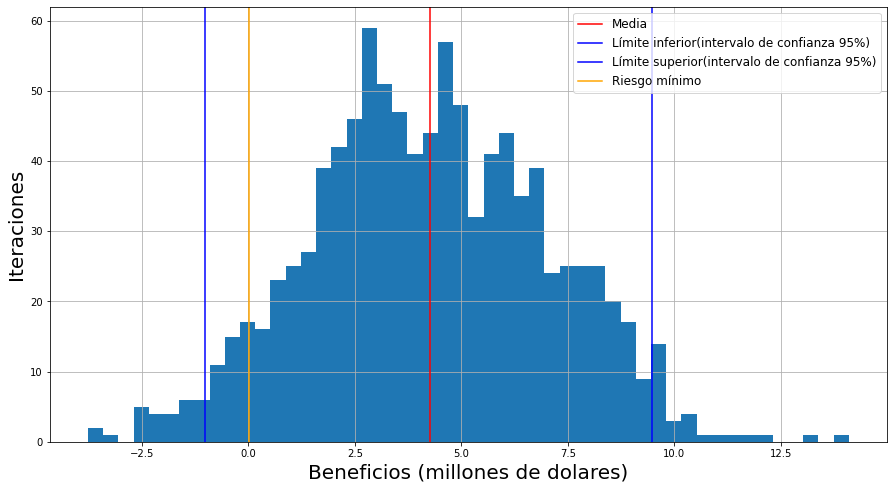

In [21]:
bootstrapping(real_0,predicted_0,0.025,'Región 0')

Para la región 0 tenemos que el beneficio promedio que se obtendría es de 4.26 millones, y en el peor de los casos, perdidas de 1.02 millones, es decir **un riesgo de 2.5% de obtener perdidas del 1.02% de la inversión inicial.**
En general, para esta región, el riesgo de que la inversión resulte en perdidas es del 6%.

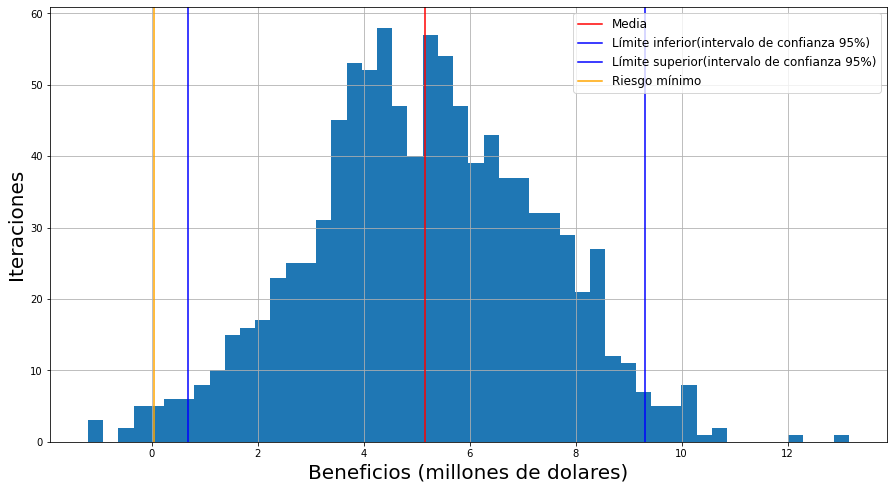

In [22]:
bootstrapping(real_1,predicted_1,0.025,'Región 1')

Para la región 1 tenemos que el beneficio promedio que se obtendría es de 5.15 millones, y en el peor de los casos, un beneficio de 0.69 millones, es decir **incluso en el limite inferior del intervalo de confianza se obtendrían ganacias.**  
En general, para esta región, el riesgo de que la inversión resulte en perdidas es del 1%.

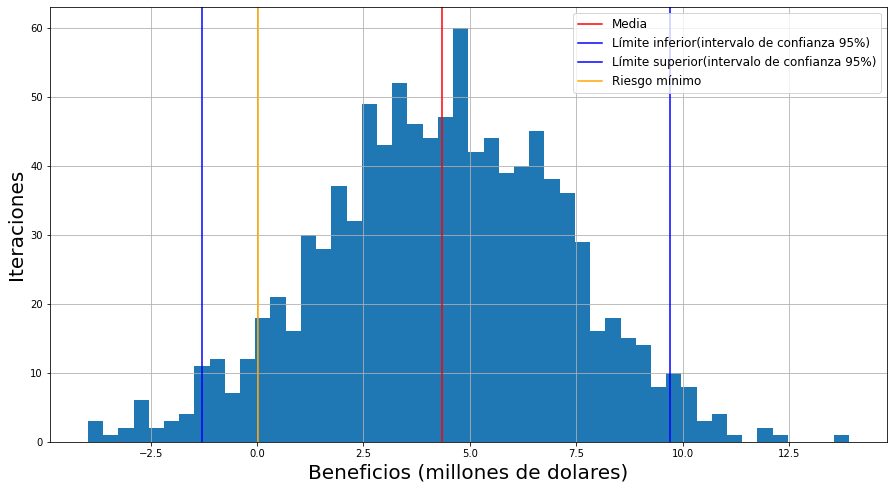

In [23]:
bootstrapping(real_2,predicted_2,0.025,'Región 2')

Para la región 2 tenemos que el beneficio promedio que se obtendría es de 4.35 millones, y en el peor de los casos, un perdidas de 1.29 millones, es decir **un riesgo de 2.5% de obtener perdidas del 1.29% de la inversión inicial.**  
En general, para esta región, el riesgo de que la inversión resulte en perdidas es del 6,4%.

## Conclusión

Las regiones 0 y 2 en promedio tienen mas volumen de yacimientos, sin embargo, la capacidad de los modelos para predecir con certeza el volumen de los yacimientos en estas regiones es menor a la prediciones de la región 2.
Con esto en mente, y luego de las pruebas mostradas anteriormente, a pesar de que la región 1 aparentemente tiene menos yacimientos, el poder predecir con mayor certeza el volumen de los yacimientos disminuye la posibilidad de elegir explotar un yacimiento con menos volumen del esperado y por consecuencia, se máximizan los beneficios.  
**Para la región 1, en el limite inferior de confianza de 95% (el peor de los casos), con una probabilidad de un 2.5% de riesgo, las ganancias mínimas seguiran siendo mayores que la inversión inicial. Además, el riesgo de que la inversión resulte en perdidas es del 1%, riesgo mucho menor si lo comparamos con el 6% de las otras regiones, es por esto que mi recomedación es realizar estudios de 500 nuevos puntos en la región 1 y luego elegir los mejores 200 usando el modelo confeccionado en este proyecto.**